# ________________Assignment__________________________________________________

### PROCESS FLOW

1. Import the required libraries.
2. EDA:
   - Import the data.
   - Read and understand the data:
     - Check the shape of the data.
     - Use `info()` to get information about the data.
     - Use `describe()` to get descriptive statistics of the data.
3. Data cleaning:
     - Handle null values.
     - Standardize the data.
4. Data Visualization:
   - Bivariate analysis:
     - For numerical vs. numerical variables, use pair plots or scatter plots.
     - For categorical vs. categorical variables, bar plots.
     - For categorical vs. numerical variables, use box plots.
   - Multivariate analysis:
     - Use a heat map to visualize the correlation matrix of selected columns from the bivariate analysis.
6. Data preparation:
   - Create dummy variables for categorical variables if present.
   - Split the data into train and test sets.
   - Scale the data using min-max scaling.
7. Model building:
   - Apply the linear regression (LR) model on the train data to build the model and obtain predicted Y values.
8. VIF and RFE:
   - Drop variables that show little change in R2 value and have a high p-value.
   - Repeat the above step multiple times to achieve a high R2 value (or adjusted R2) and low p-value.
9. Validate the assumptions:
   - Check if the model assumptions are met.
10. Model eveluation using test set.
 - Evaluate the model using appropriate evaluation metrics.

##  1. IMPORT BLOCK 

In [1]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
# analysis libraries
import numpy as np
import pandas as pd
#visuvalization library
import matplotlib.pyplot as plt
import seaborn as sns
#statistical libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson

## 2. EDA

### - READING THE DATA

In [2]:
# Read the data from csv file
df = pd.read_csv('day.csv')

### - DATA COMPREHENSION

In [3]:
# reviewing the dataframe.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### - Check the shape of the data

In [4]:
# checking the shape of the data frame.
df.shape

(730, 16)

#### - Use info() to get information about the data.

In [5]:
# checking the nulls and data types of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### - Use describe() to get descriptive statistics of the data.

In [6]:
# checking the decription of the columns.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Since the given dataframe doesn't contain any null values and unwanted columns, we can proceed directly to the standardizing part. However, it appears that some column names have been shortened and need to be abbreviated. lets recheck for the confirmation.

## 3. DATA CLEANING:

### - Handle null values.

In [7]:
#checking the columns with null values.
nullcheck=[k for (k,v) in (df.isnull().mean().to_dict()).items() if v>0]
nullcheck

[]

#### - Cheking for Duplicate records:

In [8]:
# dropping the duplicate values
# Copying the dataframe into new
df_copy = df.copy()
# checking the shape of new dataframe
df_copy.shape
(730, 16)
# dropping the duplicates
df_copy.drop_duplicates(inplace=True)
# re-verifying the shape of new dataframe
df_copy.shape

(730, 16)

#### The nullcheck variable will list the columns that has nulls in it, since the list is empty and the shape of the data frame after duplicate is same as we can proceed for standardization.

### - Standardize the data.

#### Found that date is mentioned as dteday, year is mentioned as yr, month is mentioned as mnth, humidity is mentioned as hum, Temperature is mentioned temp and Count as cnt,  lets rename them. 

In [9]:
# Renaming columns
df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'temp': 'temperature', 'cnt': 'count'}, inplace=True)

# Dropping unwanted columns
df.drop(['instant', 'date', 'casual', 'registered'], axis=1, inplace=True)

# Mapping numerical values to categorical labels for the 'season' column
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Mapping numerical values to month abbreviations for the 'month' column
df['month'] = df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Mapping numerical values to weekday abbreviations for the 'weekday' column
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Mapping numerical values to descriptive labels for the 'weathersit' column
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light snow/rain', 4: 'Heavy snow/rain'})

# Displaying the modified dataset
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### The numercial-categorical columns need to be converted to categorical columns based on the decriptions of the columns becasue in the modeling it may create many similar variables.

### - Saggregating the data into numericals and categoricals

We got 8 Numericals and 4 categorical variables 

In [10]:
#seperating the columns according to the dtypes
ints=[k for (k,v) in (df.dtypes.to_dict().items()) if v=='int64']
floats=[k for (k,v) in (df.dtypes.to_dict().items()) if v=='float64']
objects=[k for (k,v) in (df.dtypes.to_dict().items()) if v=='object']

in ints we can see that year, holiday, workingday columns are booleans actually that will come under numerical categorical

In [11]:
#removing count in order to seperate numerical-categorical and numerical columns
ints.remove('count')

In [12]:
#listing out all the categorical columns
cat_cols= objects+ints
cat_cols

['season', 'month', 'weekday', 'weathersit', 'year', 'holiday', 'workingday']

In [13]:
num_cols= floats+['count']
num_cols

['temperature', 'atemp', 'humidity', 'windspeed', 'count']

### 4. DATA VISUALIZATION

#### - NUMERICAL COLUMNS

<Figure size 1200x1600 with 0 Axes>

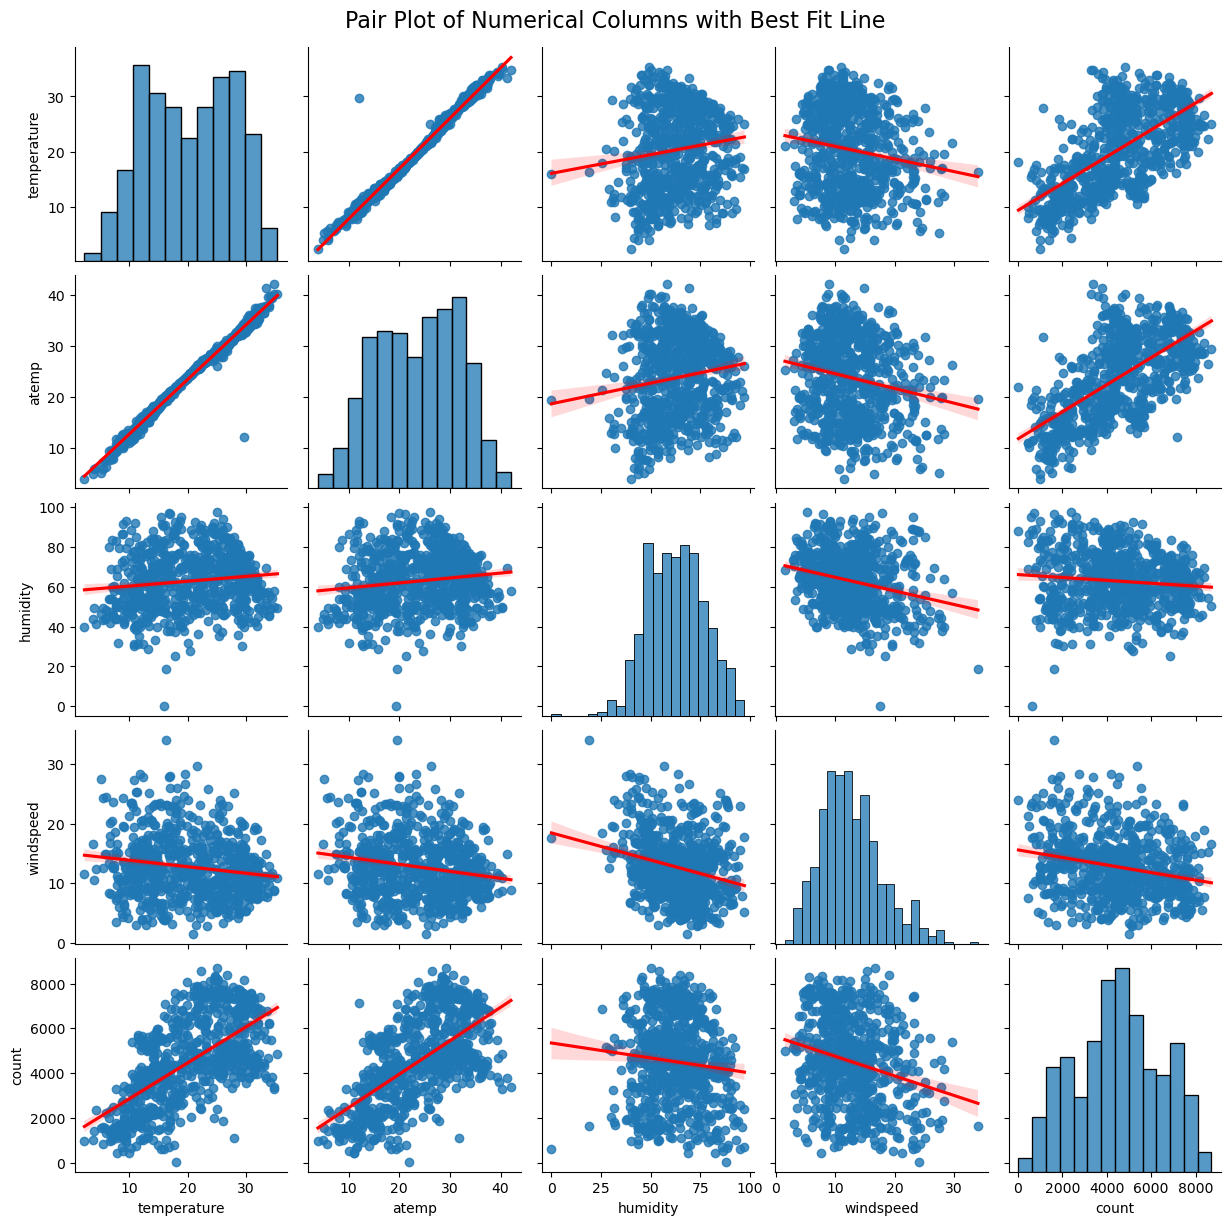

In [14]:
# Create a pair plot with proper labels and increased size
plt.figure(figsize=(12, 16))  # Set the size of the figure
g = sns.pairplot(df[num_cols], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.subplots_adjust(top=0.95)
plt.suptitle('Pair Plot of Numerical Columns with Best Fit Line', fontsize=16)
plt.show()

temperature and atemp has a pattren in the plot and rest all are randomly distributed 

#### -NUMERICAL-CATEGORICAL COLUMNS

*****************************************************************************************************************************


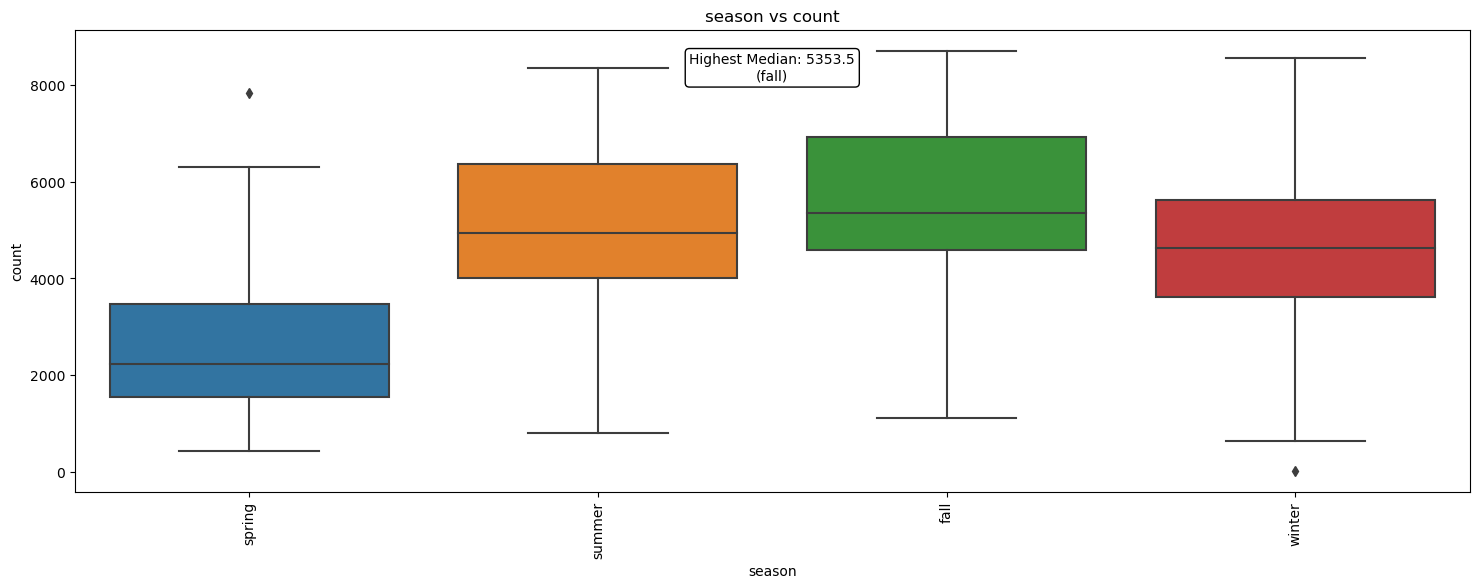

*****************************************************************************************************************************


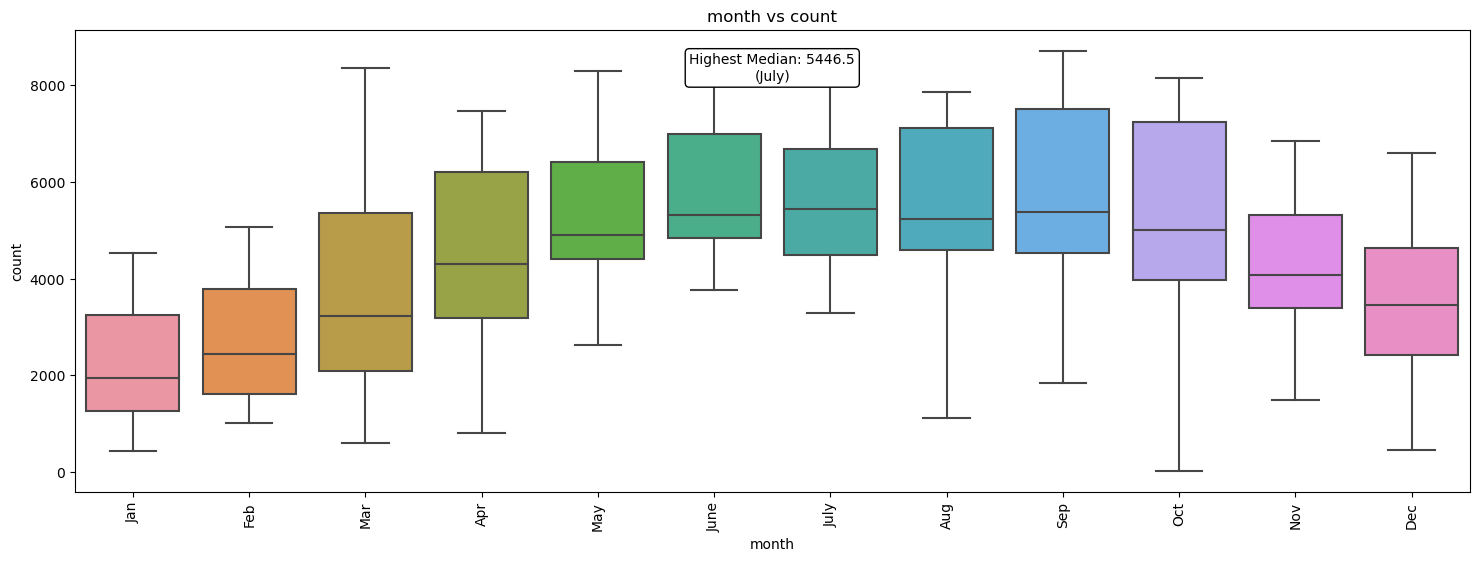

*****************************************************************************************************************************


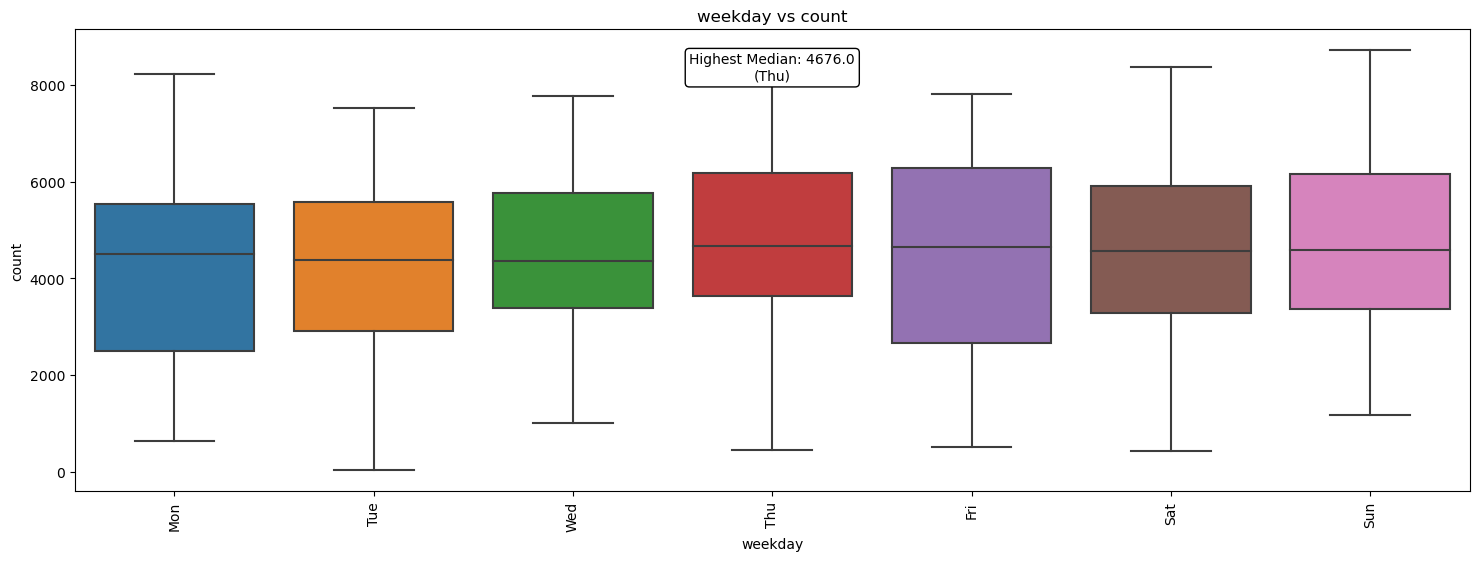

*****************************************************************************************************************************


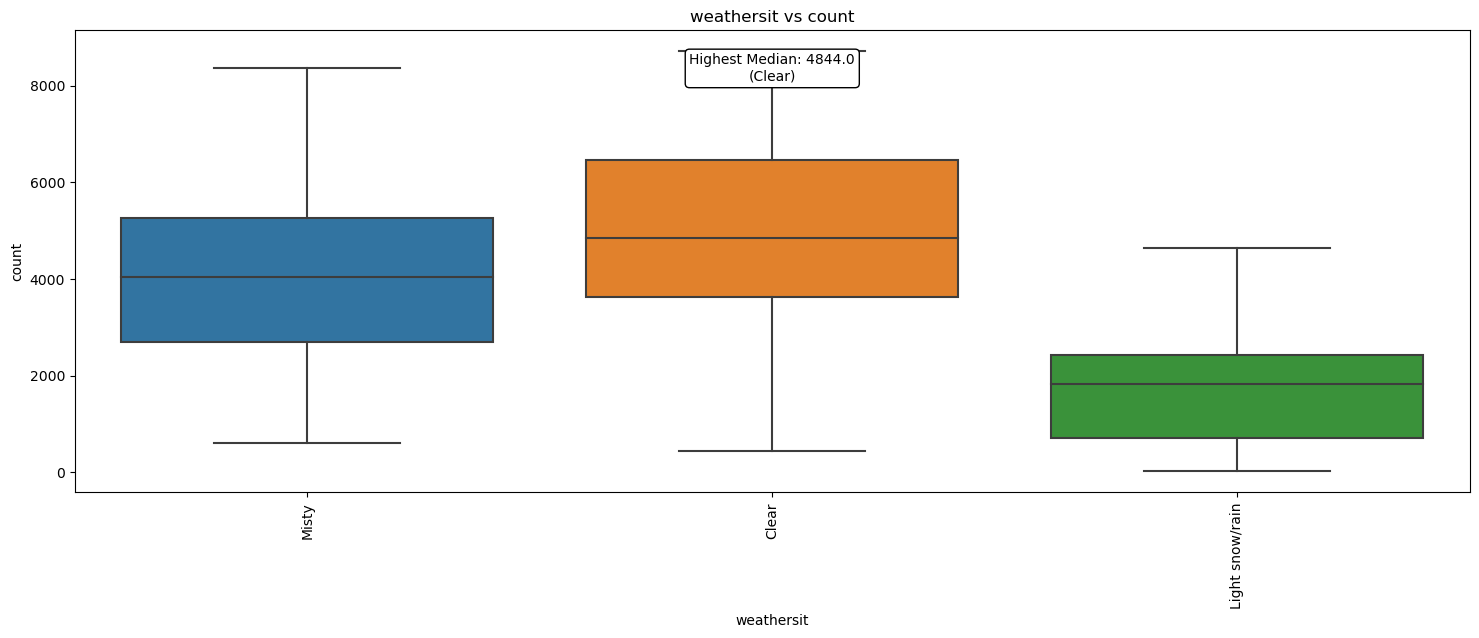

*****************************************************************************************************************************


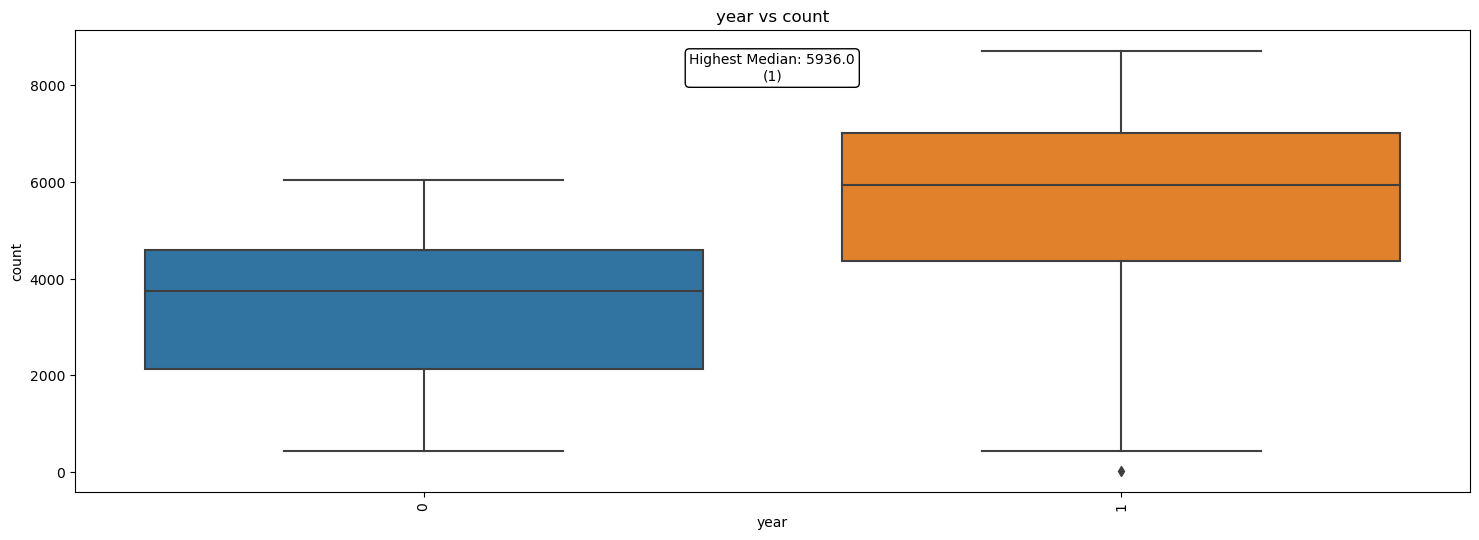

*****************************************************************************************************************************


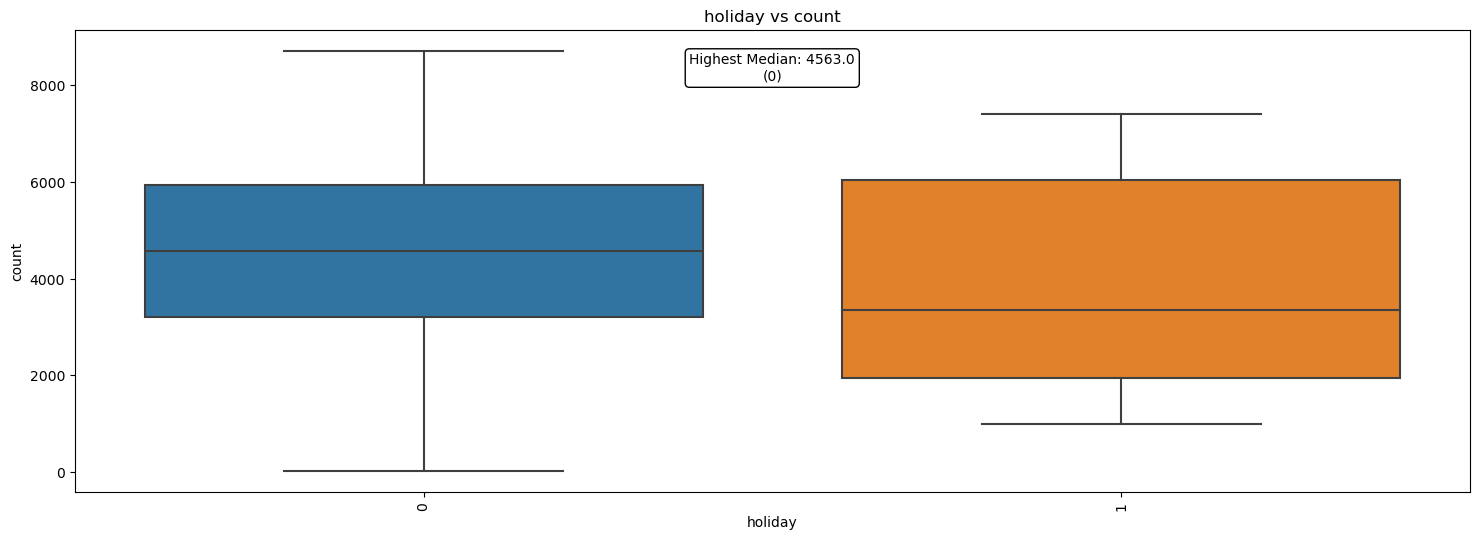

*****************************************************************************************************************************


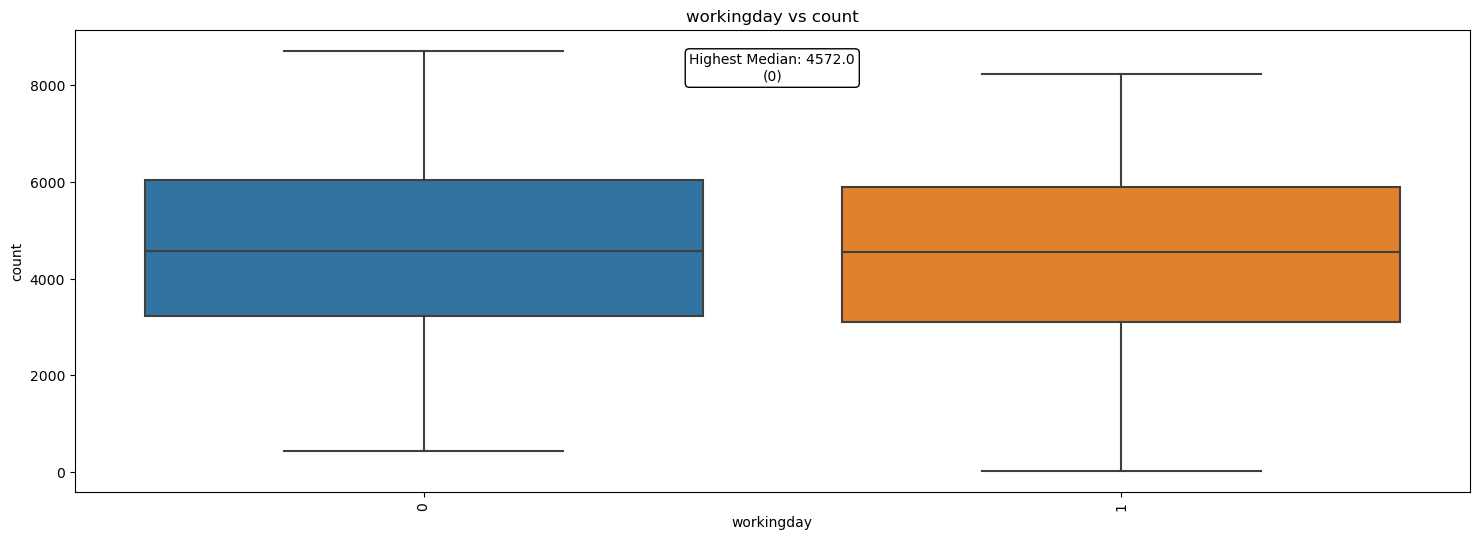

In [15]:
for i in cat_cols:
    plt.figure(figsize=(18, 6))
    ax = sns.boxplot(x=i, y='count', data=df)
    plt.title(f"{i} vs {'count'}")
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('count')
    # Get the highest median value
    highest_median = df.groupby(i)['count'].median().max()
    # Find the category with the highest median
    highest_median_category = df.groupby(i)['count'].median().idxmax()
    # Annotate the highest median value and the category name
    ax.annotate(f'Highest Median: {highest_median}\n({highest_median_category})', xy=(0.5, 0.95),
                xycoords='axes fraction', ha='center', va='top', bbox=dict(boxstyle='round', facecolor='white'))
    print('*'*125)
    plt.show()

Here are the key insights from the box plots illustrating the statistical data of categorical variables plotted against the count variable (Y-variable):

- Among the seasons, the fall category exhibits the highest median count. This suggests that during the fall season, the count variable tends to have a higher central value compared to other seasons.

- When considering the months, July stands out with the highest median count. This implies that during the month of July, the count variable tends to be relatively higher compared to other months.

- Looking at the weekdays, Thursday shows the highest median count. This indicates that on Thursdays, the count variable tends to have a higher central value compared to other weekdays.

- Considering the weathersit variable, the clear category has the highest median count. This suggests that during clear weather conditions, the count variable tends to be relatively higher compared to other weather situations.

- If the day is not a holiday, it is associated with the highest median count. This implies that on non-holiday days, the count variable tends to have a higher central value compared to holiday days.

- Similarly, if it is not a working day, the highest median count is observed. This suggests that on non-working days, such as weekends or non-business days, the count variable tends to be relatively higher compared to working days.

These observations provide insights into the relationship between the categorical variables and the count variable. They help identify which categories within each variable are associated with higher or lower values of the count variable, giving an understanding of the factors that contribute to variations in the count.

### - CATEGORICAL COLUMNS

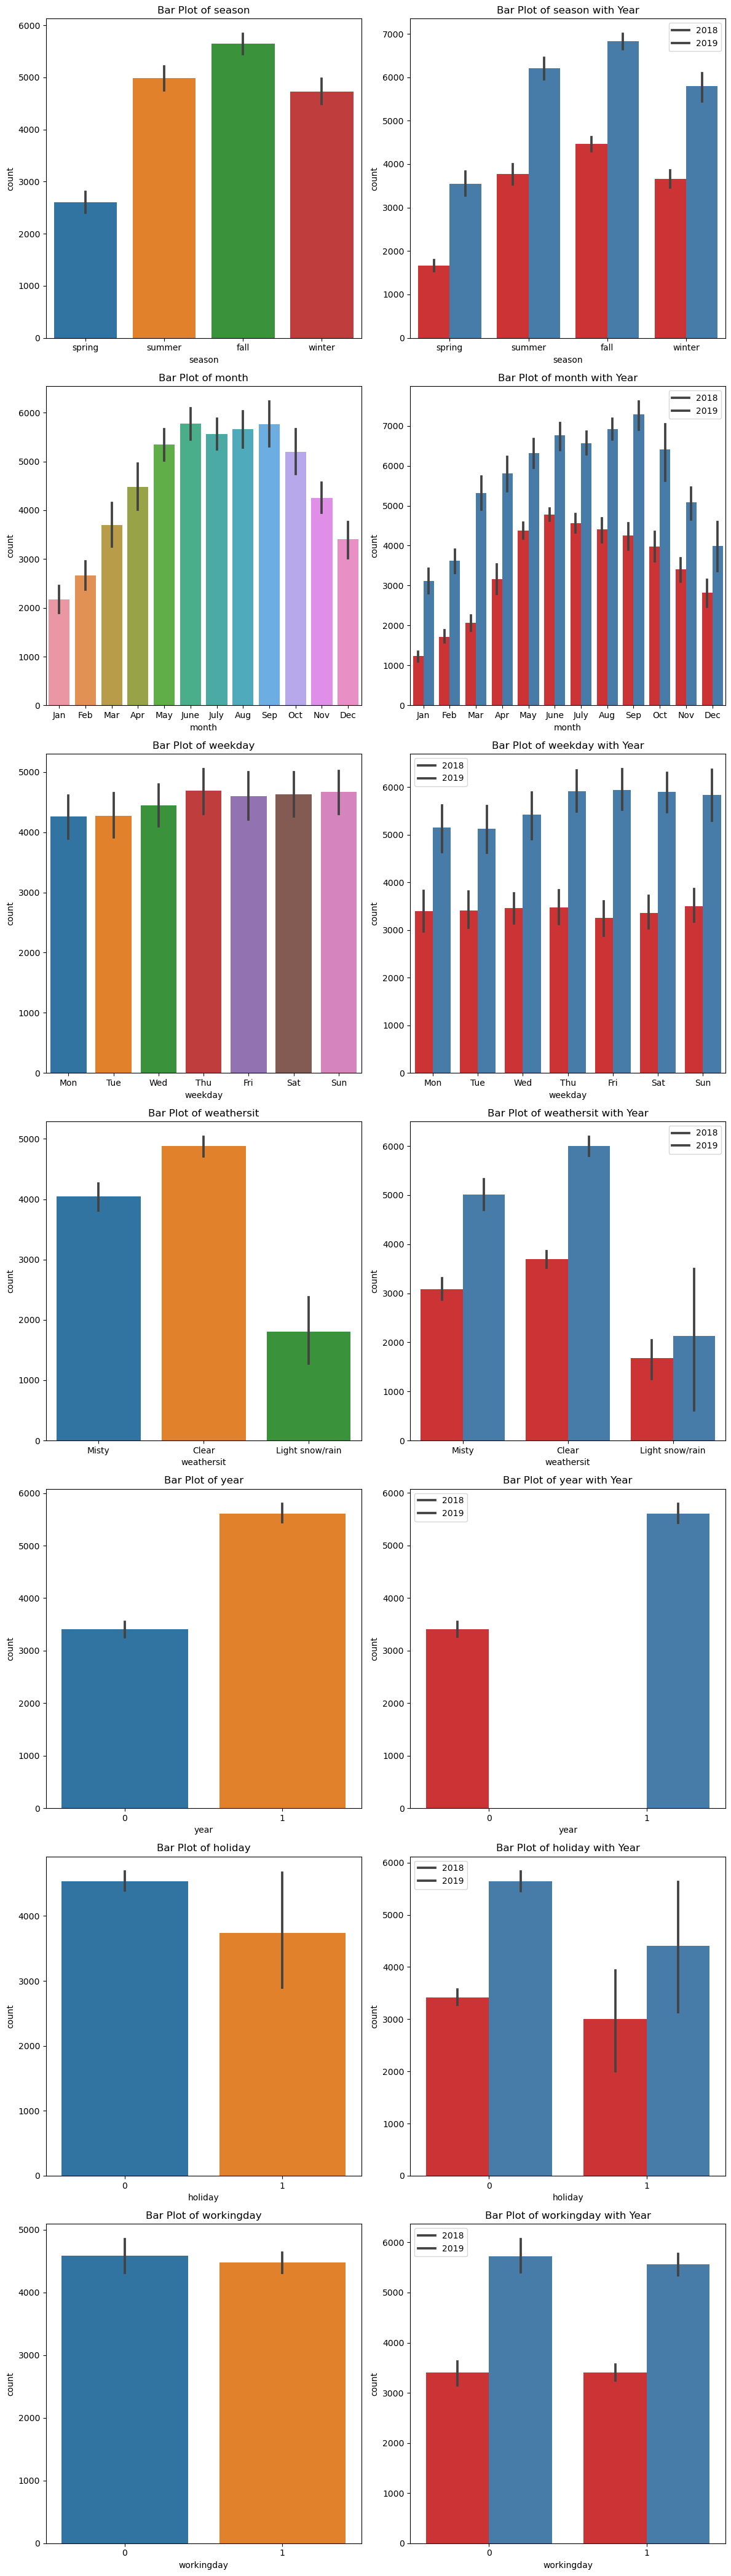

In [16]:
plt.figure(figsize=(12, 6 * len(cat_cols)))  # Set the figure size based on the number of categorical columns
# Loop through each categorical column
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 2, i * 2 - 1)  # Create the subplot for the first bar plot
    sns.barplot(x=col, y='count', data=df)  # Plot the bar plot
    plt.title(f'Bar Plot of {col}')  # Set the title of the plot
    plt.subplot(len(cat_cols), 2, i * 2)  # Create the subplot for the second bar plot
    sns.barplot(x=col, y='count', data=df, hue='year', palette='Set1')  # Plot the bar plot with hue
    plt.title(f'Bar Plot of {col} with Year')  # Set the title of the plot with hue
    plt.legend(labels=['2018', '2019'])  # Set the legend labels for the hue
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plots

Based on the analysis, it is evident that bike rentals are significantly higher in the year 2019 across all categories. This indicates that in comparison to other years, the year 2019 experienced a notable increase in bike rental activity.

 - The findings suggest that various factors or conditions associated with the year 2019 might have contributed to the higher demand for bike rentals. These factors could include favorable weather conditions, promotional campaigns, increased awareness about bike-sharing programs, or other external factors that boosted the popularity of bike rentals during that particular year.

 - Understanding the temporal patterns and identifying specific years with higher or lower bike rental activity is valuable for businesses or organizations involved in bike rental services. It helps them make informed decisions regarding resource allocation, marketing strategies, and operational planning to meet the demand and maximize the utilization of their bike rental services.

### - MULTIVARIATE ANALYSIS TO CHECK CORRELATION

Highest Correlation: temperature - atemp (0.99)


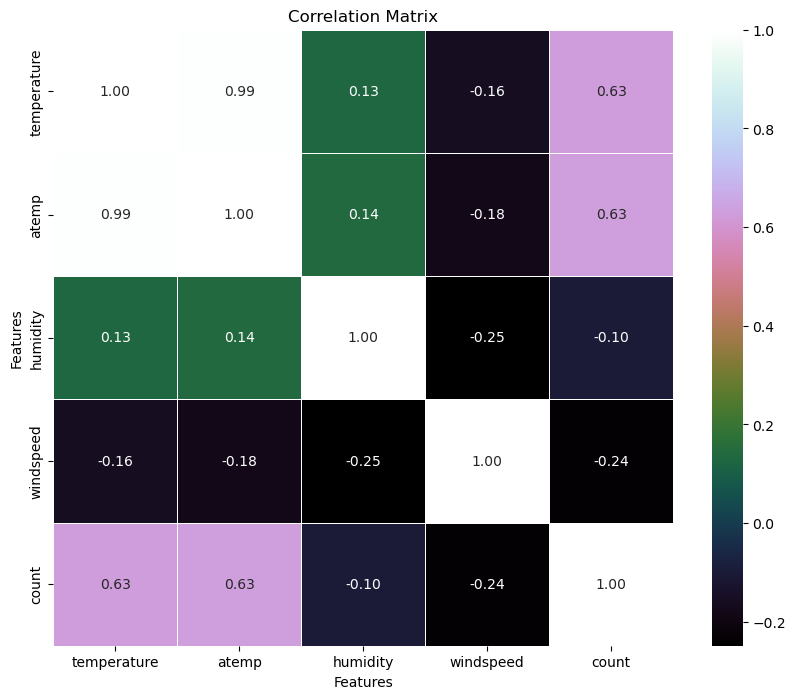

In [17]:
# Create correlation matrix
correlation_matrix = df[num_cols].corr()
# Set up the figure and axes
plt.figure(figsize=(10, 8))
# Create heatmap with custom color palette
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
# Find the pair of variables with the highest correlation
highest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
highest_corr = highest_corr[highest_corr != 1.0]  # Exclude self-correlation
highest_corr_labels = highest_corr.idxmax()
# Get the highest correlated variables and their correlation value
var1, var2 = highest_corr_labels
corr_value = correlation_matrix.loc[var1, var2]
# Set title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
# Print highest correlation separately
print(f'Highest Correlation: {var1} - {var2} ({corr_value:.2f})')
# Show the plot
plt.show()

According to the analysis, the following correlations have been observed:

- The correlation between "temp" and "atemp" is the highest, indicating a positive relationship.
- The second highest correlation is between "temp" and "count."
- "atemp" and "count" also show a positive correlation.
- "windspeed" has the highest negative correlation with the "count" variable.
- "humidity" has the highest negative correlation with "windspeed."
- "humidity" has the least negative correlation with the "count" variable.
- The correlation between "temp" and "count" is significant and implies a positive relationship.
- Due to the high correlation between "temp" and "atemp" (as "atemp" is derived from "temp"), only "temp" is considered for further analysis to avoid multicollinearity.

Using dashes instead of numbers provides a more qualitative description of the correlations, indicating the direction and strength of the relationships between the variables.

## 5. DATA PREPERATION

### - ENCODING THE CATGORICAL VARIABLES TO NUMERICALS

In [18]:
# Initialize df_dummy with the original DataFrame
df_dummy = df  
dummy_frames = {}
for i in objects:
    dummy_frames[str(i) + '_df'] = pd.get_dummies(df[i], drop_first=True)
for i in dummy_frames.values():
    df_dummy = pd.concat([df_dummy, i], axis=1)
df_dummy.drop(objects, inplace= True, axis=1)

Using `drop_first=True’ It ensures that one dummy variable is dropped as a reference category, making the remaining dummy variables independent and providing clear comparisons between categories.
during dummy variable creation is important to avoid multicollinearity issues, improve model interpretability, and reduce model complexity.

In [19]:
df_dummy.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_dummy.shape

(730, 30)

In [21]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temperature      730 non-null    float64
 4   atemp            730 non-null    float64
 5   humidity         730 non-null    float64
 6   windspeed        730 non-null    float64
 7   count            730 non-null    int64  
 8   spring           730 non-null    uint8  
 9   summer           730 non-null    uint8  
 10  winter           730 non-null    uint8  
 11  Aug              730 non-null    uint8  
 12  Dec              730 non-null    uint8  
 13  Feb              730 non-null    uint8  
 14  Jan              730 non-null    uint8  
 15  July             730 non-null    uint8  
 16  June             730 non-null    uint8  
 17  Mar             

Now our data is encodaed totally to numerical columns, now we can start splitiing the data into train and test sets

### - CREATING THE TEST AND TRAIN SETS AND SCALE THE DATA

In [22]:
# Split the dataframe into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df_dummy, train_size=0.7, random_state=100)
# Check the shape of the training dataset
print("Training dataset shape:", df_train.shape)
# Check the shape of the testing dataset
print("Testing dataset shape:", df_test.shape)
# Apply MinMaxScaler to rescale the numerical variables
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
# Verify the head of the training dataset after scaling
df_train.head()

Training dataset shape: (510, 30)
Testing dataset shape: (220, 30)


,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


By examining the correlation heatmap, we can gain insights into which variables are strongly correlated with each other and with the target variable. This information helps in feature selection, identifying redundant variables, understanding the impact of different variables on the target, and guiding further analysis and modeling decisions.

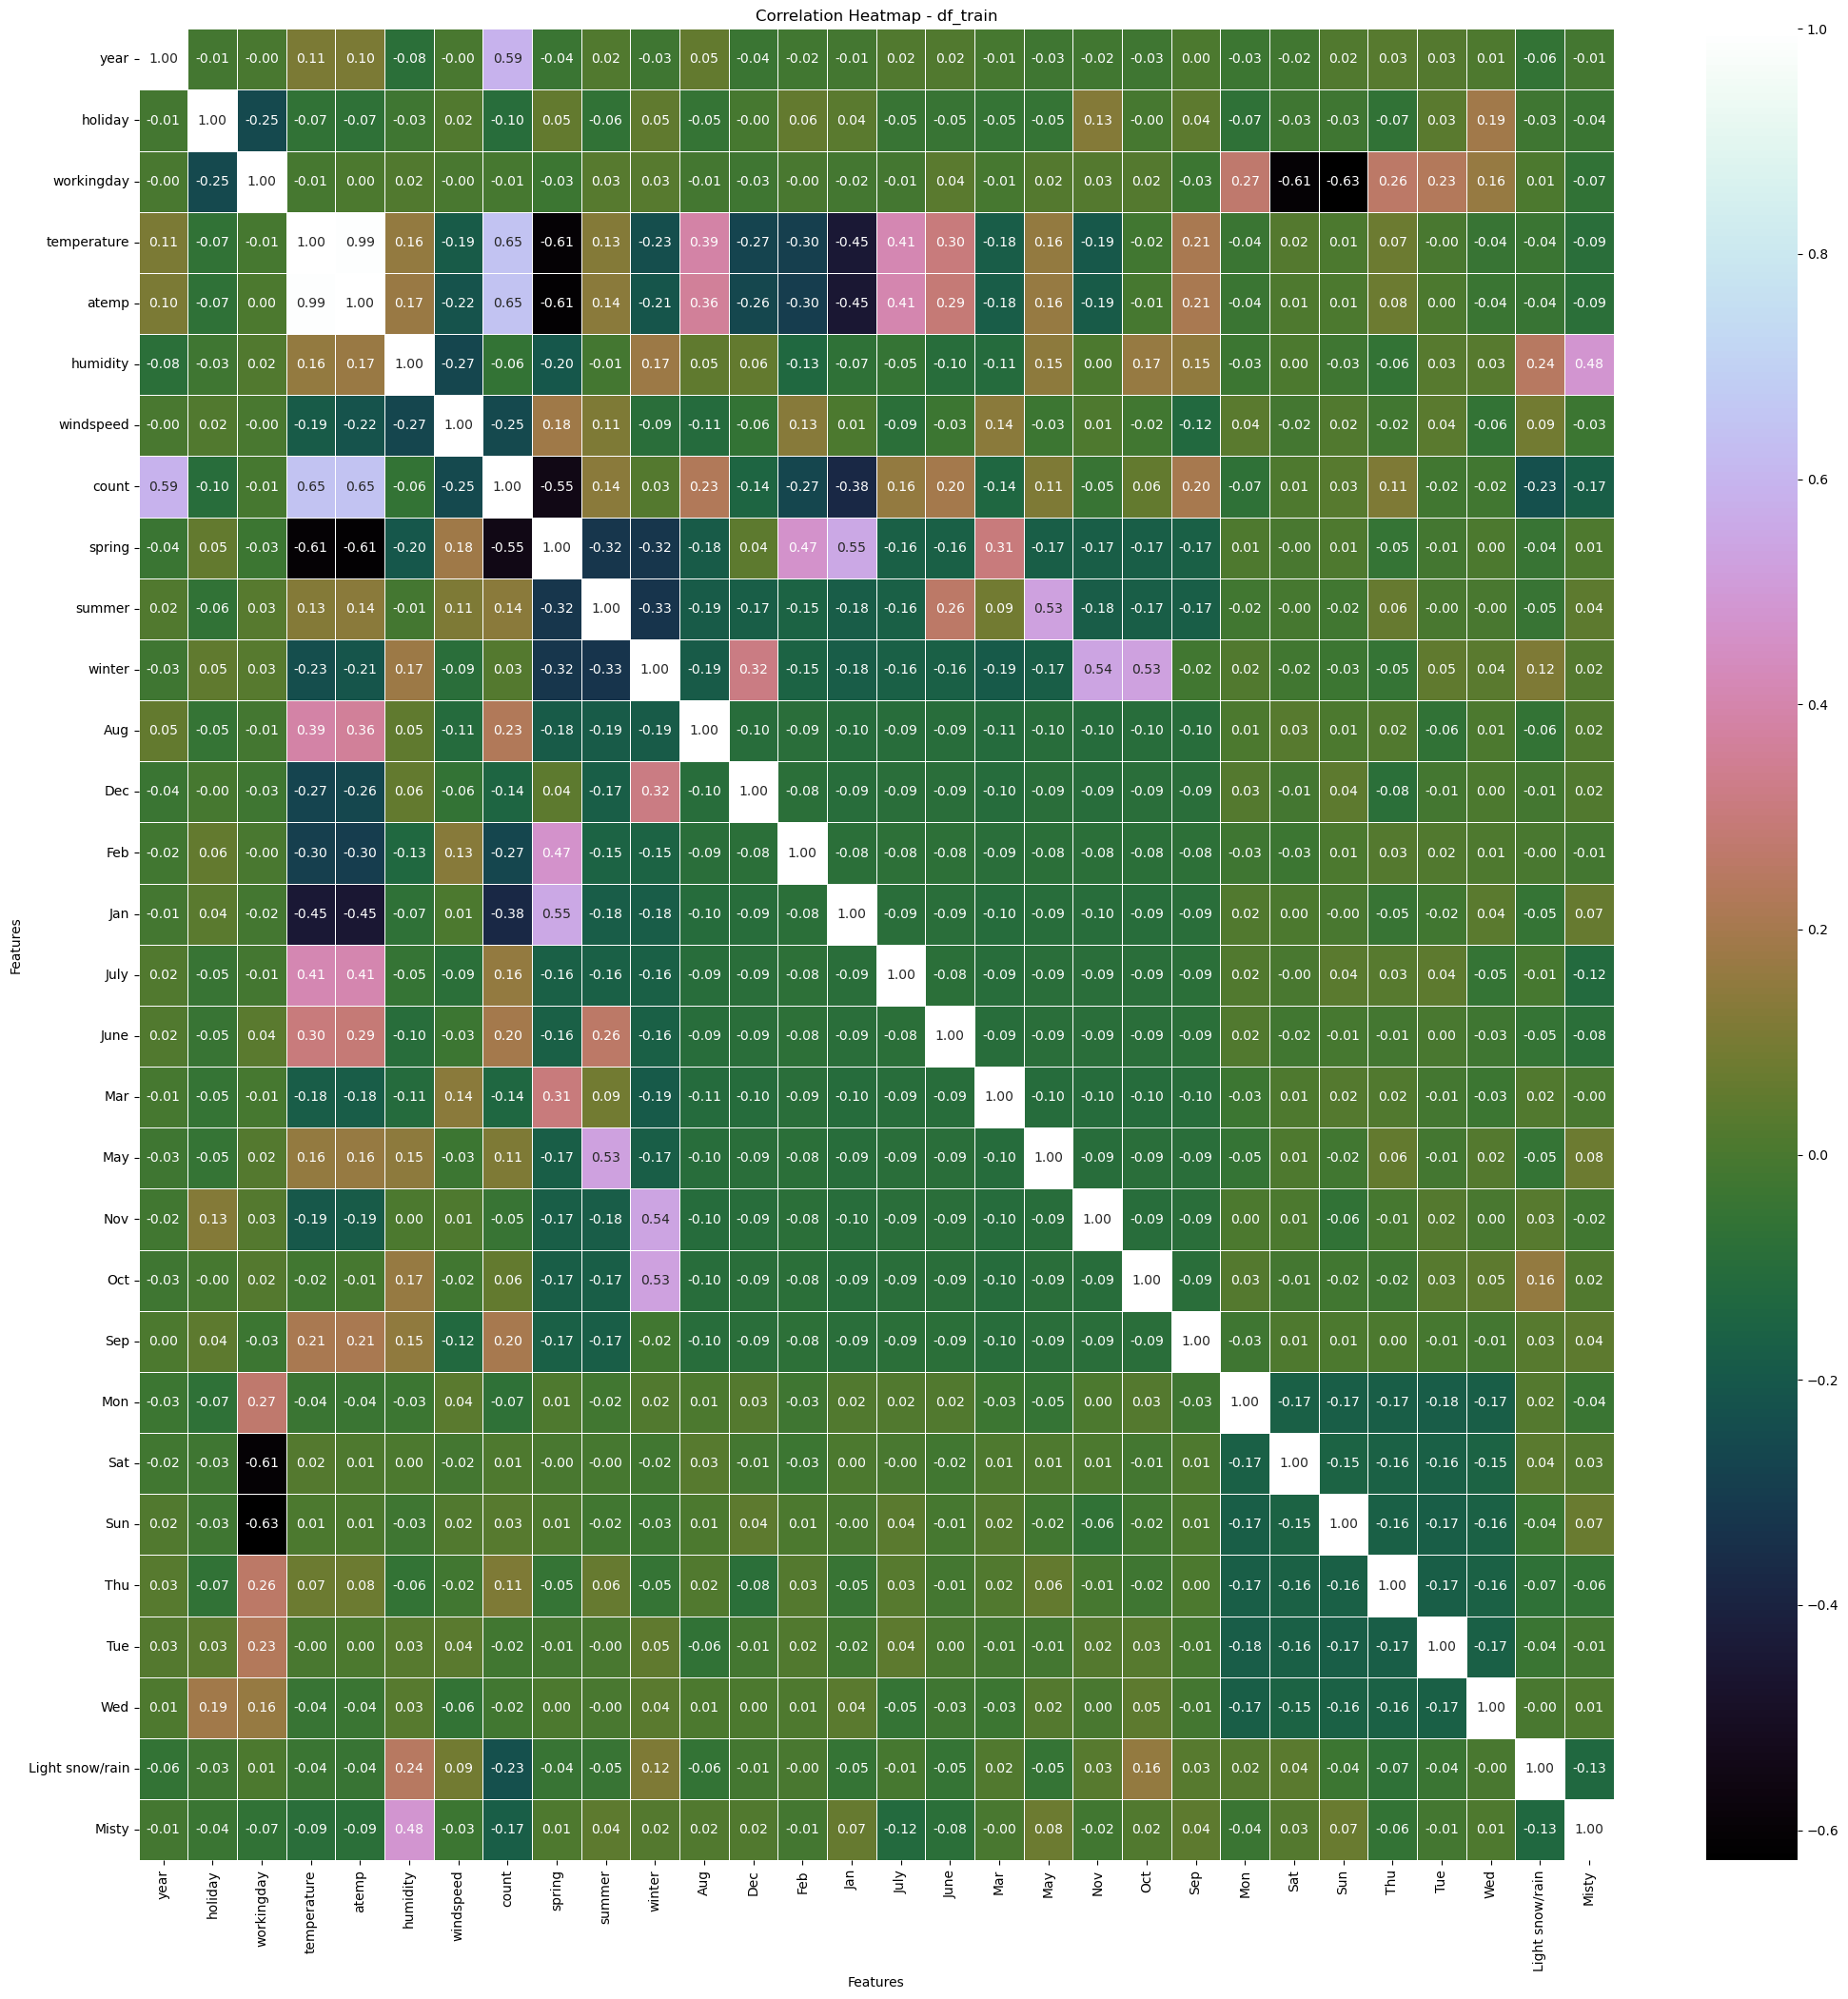

In [23]:
# Calculate the correlation matrix
corr_matrix = df_train.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
# Set title and labels
plt.title('Correlation Heatmap - df_train')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

 As the Y-variable is the count and with respect to the count we can see the following X- variables have the correlations as follows:
 - Top Positive correlation variables:
     - temperature has the highest positive correlation with count and values 0.65
     - atemp also has the highest positive correlation with count and values 0.65( atemp is highly correlated with the temperature so it is a derived variable)
     - year has the positive correlation with count and values 0.59
     - Sep and June has the positive correlation with count and values 0.20
     - Aug has the positive correlation with count and values 0.23
     - July has the positive correlation with count and values 0.16
 - Top Negetive correlation variables:
     - spring has the negetive correlation with count and values -0.55
     - Jan has the negetive correlation with count and values -0.38
     - Feb has the negetive correlation with count and values -0.27
     - Humidity has the negetive correlation with count and values -0.25
     - lightsnow/rain has the negetive correlation with count and values -0.23
     - Dec has the negetive correlation with the count and values -0.14

### 6. MODEL BUILDING

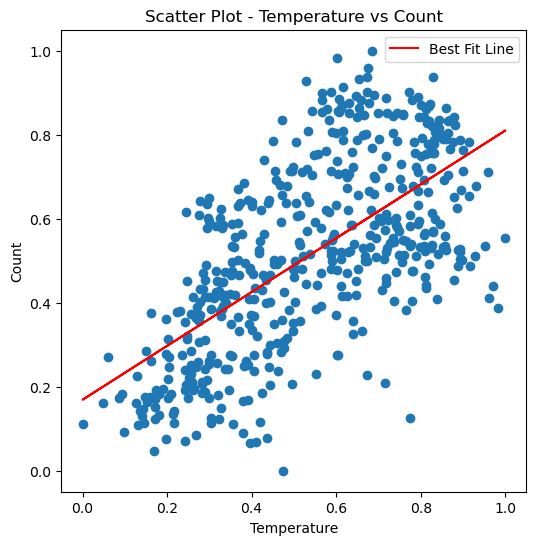

In [24]:
# plotting the best fit line with y as count and x as temp
plt.figure(figsize=[6, 6])
plt.scatter(df_train['temperature'], df_train['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter Plot - Temperature vs Count')
# Calculate the line of best fit using numpy
x = df_train['temperature']
y = df_train['count']
m, b = np.polyfit(x, y, 1)  # Fit a linear regression line (1st degree polynomial)
# Plot the best fit line
plt.plot(x, m*x + b, color='red', label='Best Fit Line')
plt.legend()
plt.show()

To confirm our hypothesis regarding the significance of temperature (due to its high correlation with Y), we constructed a regression model using temperature and cnt as variables. The resulting plot exhibits a diverse range of data points without any distinct patterns, and a best-fit line can be fitted to the data. This validates our assumption that temperature is indeed a crucial variable. Now, let us proceed to identify other potential features that can enhance the model's performance.

### 7. VIF AND RFE

### - Automated RFE

In [25]:
# Assign the target variable
y_train = df_train['count']
X_train = df_train.drop('count', axis=1)  # Drop the 'count' column from the training data
# Create a linear regression model
reg_model = LinearRegression()
# Perform recursive feature elimination with 15 features
rfe = RFE(estimator= reg_model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [26]:
# Create a list of variables selected in the top 15 based on recursive feature elimination
selected_features = [(feat, support, rank) for feat, support, rank in zip(X_train.columns, rfe.support_, rfe.ranking_) if support]


In [27]:
selected_features

[('year', True, 1),
 ('holiday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Dec', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Nov', True, 1),
 ('Sep', True, 1),
 ('Light snow/rain', True, 1),
 ('Misty', True, 1)]

In [28]:
selected_columns = [feature for feature, support, rank in selected_features]
selected_columns

['year',
 'holiday',
 'temperature',
 'humidity',
 'windspeed',
 'spring',
 'summer',
 'winter',
 'Dec',
 'Jan',
 'July',
 'Nov',
 'Sep',
 'Light snow/rain',
 'Misty']

In [29]:
# Create dataframe with RFE selected variables
X_train_rfe = X_train[selected_columns]

In [30]:
# Building 1st linear regression model
X_train_reg_model_1 = sm.add_constant(X_train_rfe)
reg_model_1 = sm.OLS(y_train, X_train_reg_model_1).fit()
print(reg_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.15e-189
Time:                        06:22:45   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

### - VIF CALCULATION and FEATURE ELIMINATION BASED ON THE VIF SCORES

In [31]:
# creating the function to calculate VIF since whe vato calculate more times according to the features eliminated.
def calVIF(df):
    vif = pd.DataFrame({'Features': df.columns, 'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]})
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [32]:
# Calculate VIF
vif_result = calVIF(X_train_rfe)
vif_result

,Features,VIF
3,humidity,30.89
2,temperature,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Misty,2.32
0,year,2.09
11,Nov,1.85
9,Jan,1.75


In [33]:
# Dropping 'humidity' from X_train_rfe as it shows high VIF values
X_train_updated = X_train_rfe.drop(['humidity'], axis=1)
# Calculate VIF for the new model
vif_result_new = calVIF(X_train_updated)

In [34]:
vif_result_new

,Features,VIF
2,temperature,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
13,Misty,1.57


Since the VIF (Variance Inflation Factor) values for each column are approximately 5 or below (considering 5 as the threshold value), we can conclude that there is no severe multicollinearity issue among the features. Therefore, we can halt the process of eliminating features based on VIF scores. Instead, we will now focus on manually performing feature elimination using p-values as a criterion.

### - MANUAL FEATURE ELIMINATION USING P-Value

In [35]:
# Building 2nd linear regression model
X_train_reg_model_2 = sm.add_constant(X_train_updated)
reg_model_2 = sm.OLS(y_train, X_train_reg_model_2).fit()
print(reg_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.75e-186
Time:                        06:22:45   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [36]:
# Dropping 'Nov' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Nov'], axis=1)
# Building 3rd linear regression model
X_train_reg_model_3 = sm.add_constant(X_train_updated)
reg_model_3 = sm.OLS(y_train, X_train_reg_model_3).fit()
print(reg_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.74e-186
Time:                        06:22:45   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031     

In [37]:
# Dropping 'Dec' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Dec'], axis=1)
# Building 3rd linear regression model
X_train_reg_model_4 = sm.add_constant(X_train_updated)
reg_model_4 = sm.OLS(y_train, X_train_reg_model_4).fit()
print(reg_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.14e-187
Time:                        06:22:46   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030     

In [38]:
# Dropping 'Jan' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['Jan'], axis=1)
# Building 3rd linear regression model
X_train_reg_model_5 = sm.add_constant(X_train_updated)
reg_model_5 = sm.OLS(y_train, X_train_reg_model_5).fit()
print(reg_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          5.06e-187
Time:                        06:22:46   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [39]:
# Dropping 'July' from X_train_rfe as it shows high p values
X_train_updated = X_train_updated.drop(['July'], axis=1)
# Building 3rd linear regression model
X_train_reg_model_6 = sm.add_constant(X_train_updated)
reg_model_6 = sm.OLS(y_train, X_train_reg_model_6).fit()
print(reg_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.47e-186
Time:                        06:22:46   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030     

We can see all the P-values are almost zeros so that we can check with the VIF values also to conculde the features.

In [40]:
calVIF(X_train_updated)

,Features,VIF
3,windspeed,4.60
2,temperature,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Misty,1.55
7,Sep,1.23
8,Light snow/rain,1.08
1,holiday,1.04


We can see all the VIF values of each variables are less than the thrishold value of 5 so that we can considerate the above variables as the key features of the model.

In [41]:
reg_model_6.params

const              0.190855
year               0.234132
holiday           -0.096316
temperature        0.477737
windspeed         -0.148098
spring            -0.055406
summer             0.062076
winter             0.094476
Sep                0.090998
Light snow/rain   -0.285031
Misty             -0.078741
dtype: float64

In [42]:
X_train_reg_model_6

,const,year,holiday,temperature,windspeed,spring,summer,winter,Sep,Light snow/rain,Misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,1


In [43]:
y_train_pred = reg_model_6.predict(X_train_reg_model_6)

### 8. VALIDATING THE ASSUMPTIONS

#### - CHECKING THE NORMALITY OF THE ERROR TERMS.

Text(0.5, 0, 'Errors')

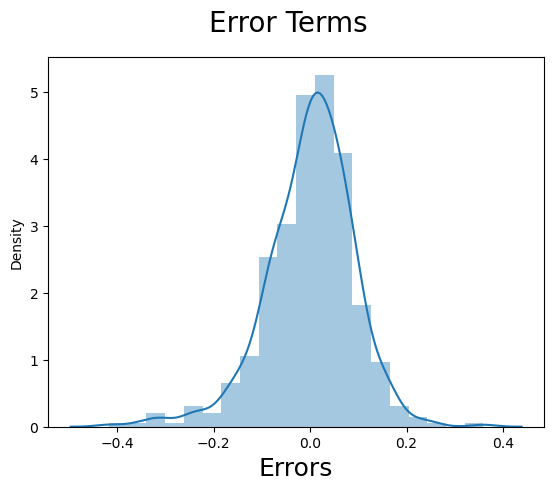

In [44]:
#checking error terms are normally distributed or not, inorder to validate our assumption.
# Plot the histogram of the error terms
plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

I examined the distribution of residuals and checked if they approximately follow a bell-shaped curve. We can see the error terms are normally distributed.

#### - CHECKING THE MULTI-COLLINEARITY

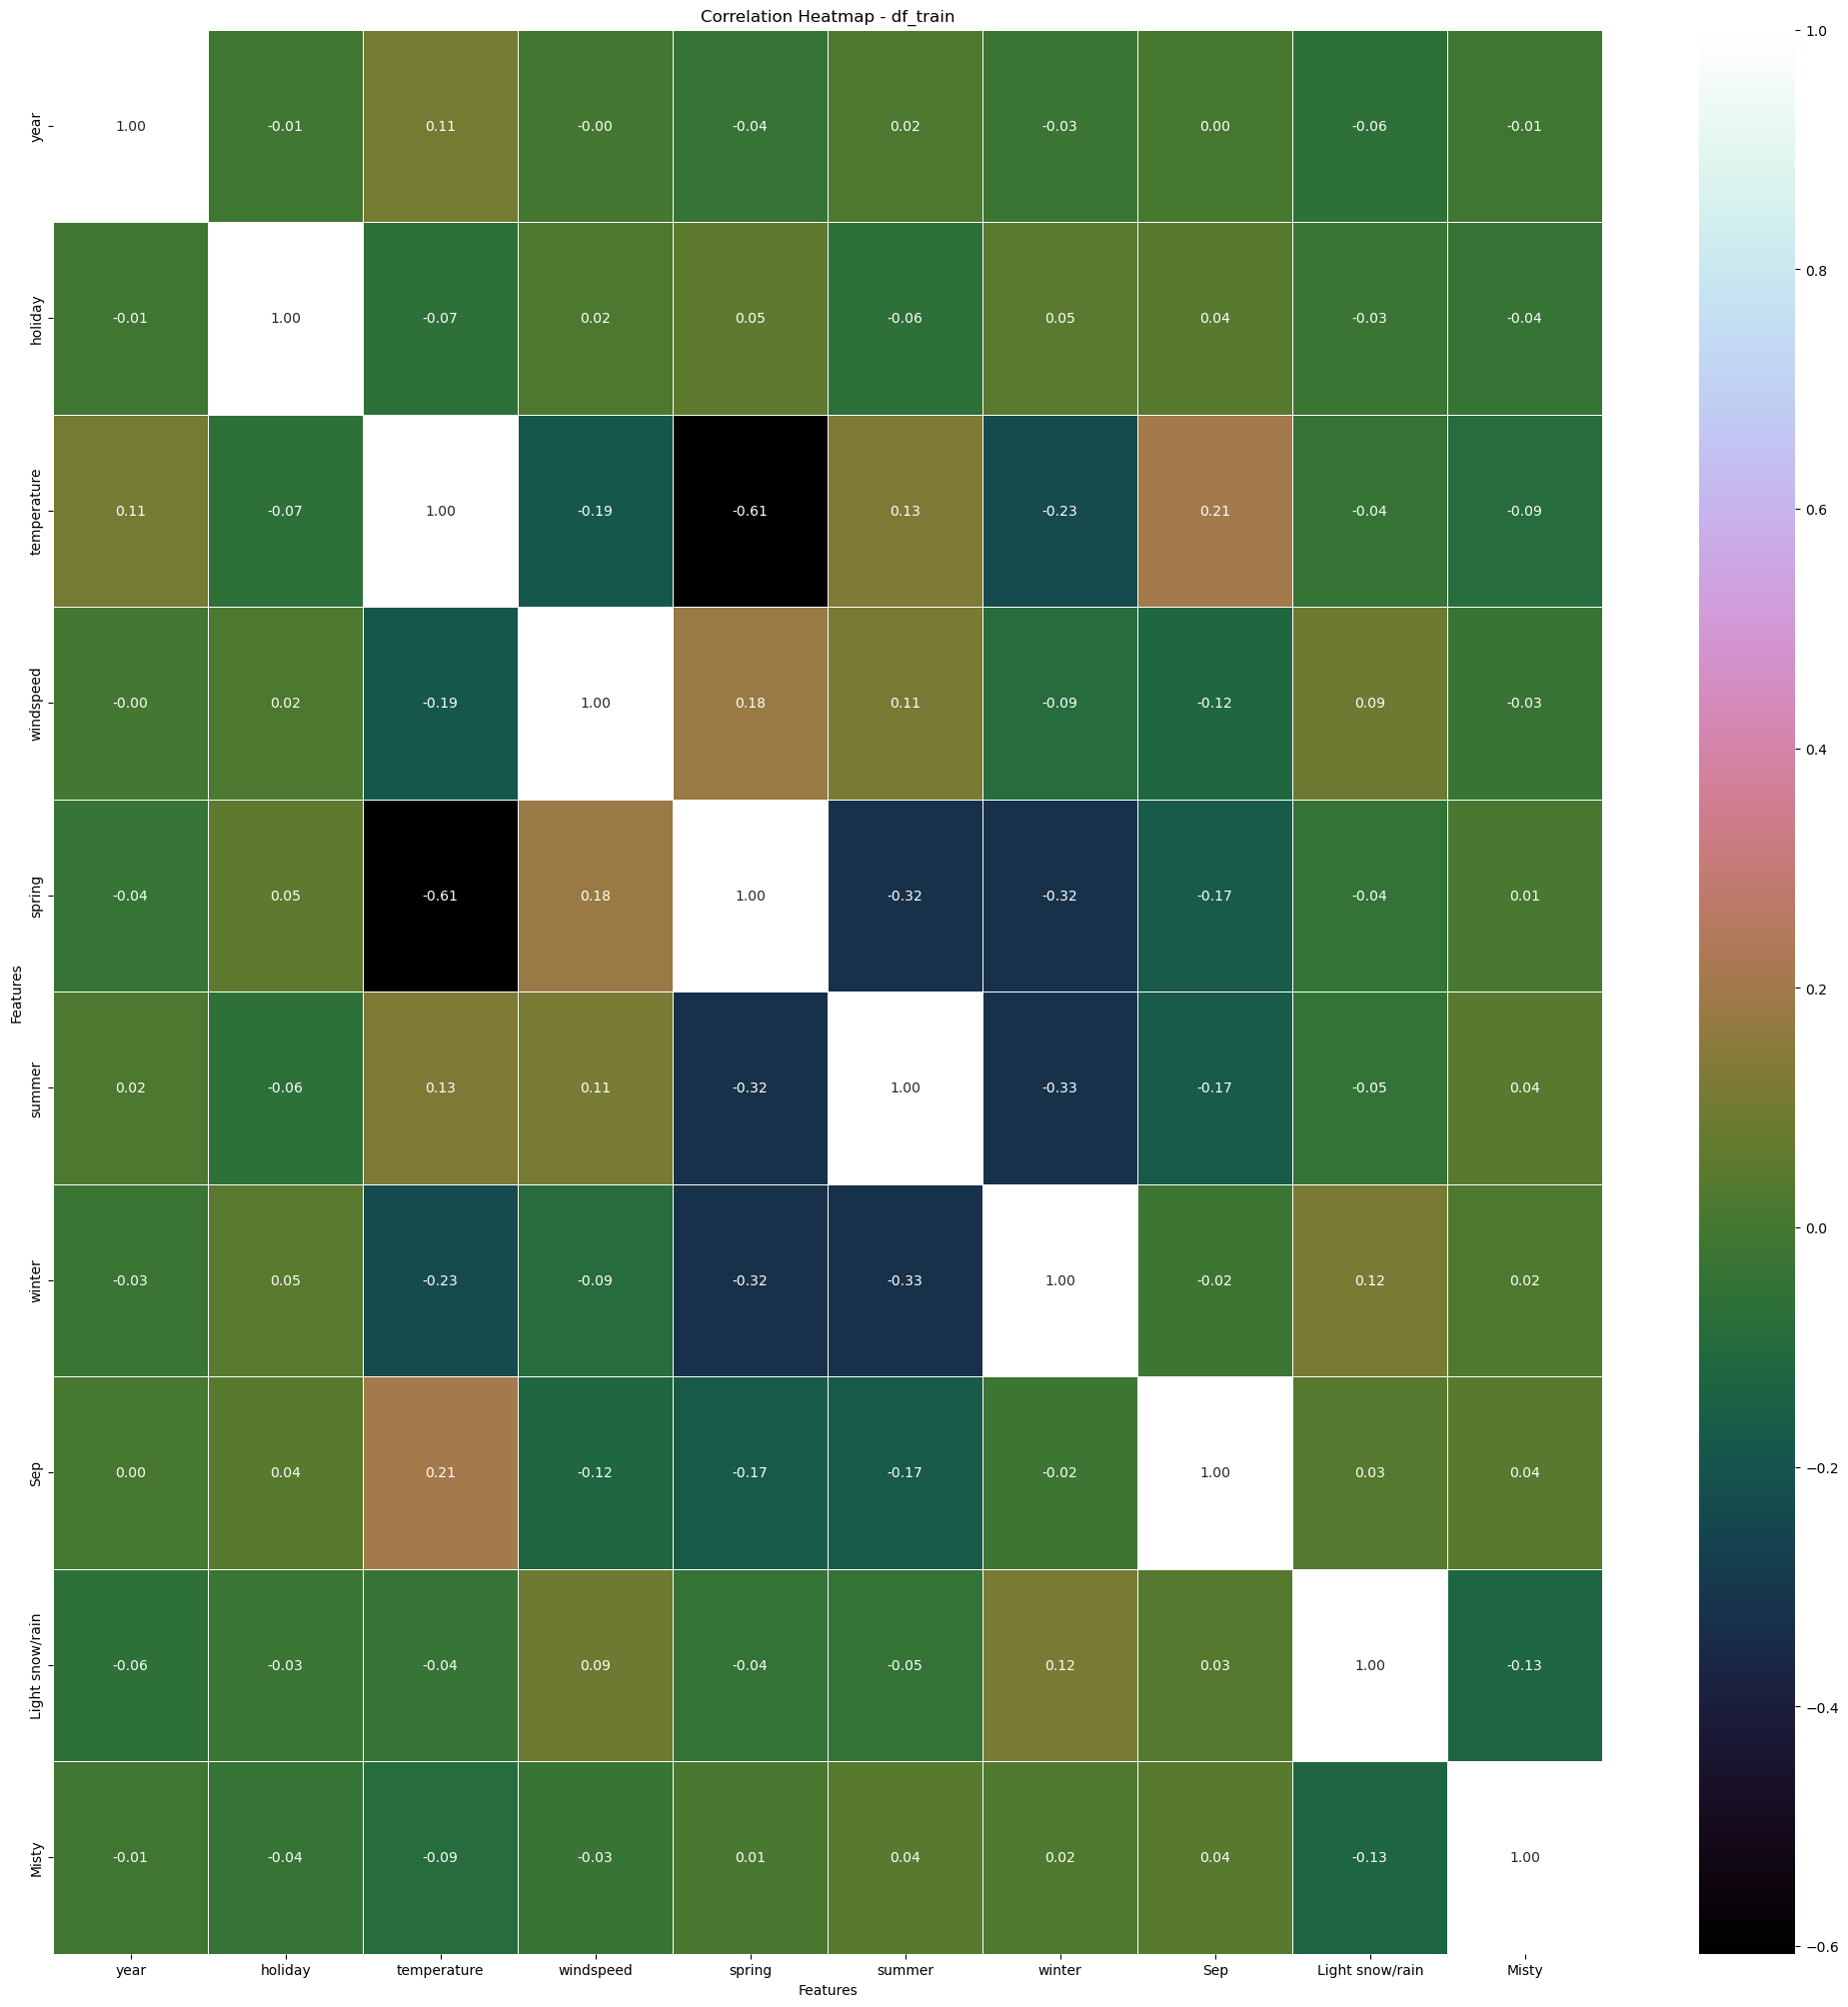

In [45]:
# Calculate the correlation matrix
corr_matrix = X_train_updated.corr()
# Set up the figure and axes
plt.figure(figsize=(25, 25))
# Create the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='cubehelix', fmt=".2f", linewidths=0.5)
# Set title and labels
plt.title('Correlation Heatmap - df_train')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

From the correlation matrix we can see that all are having very weak relation with other variables, hence all the X variables considered based on the VIF are Independent from each other.

#### - VALIDATION OF LININEARITY

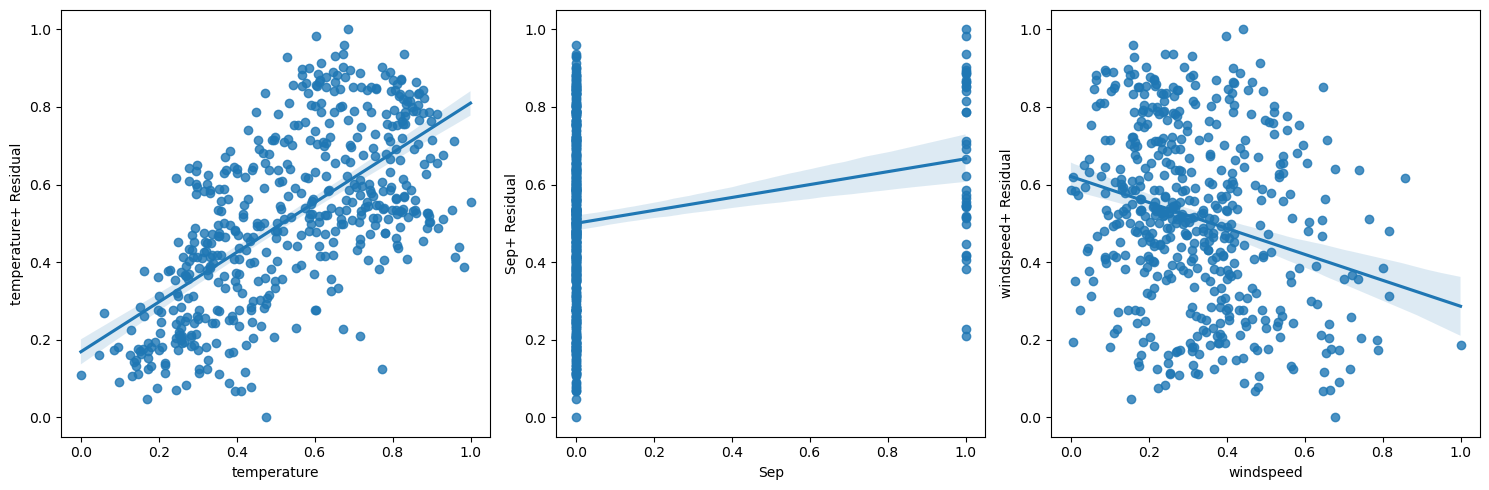

In [46]:
# Linear relationship validation using CCPR plot
variables= ['temperature','Sep','windspeed']
fig, ax = plt.subplots(1, len(variables), figsize=(15, 5))
for i, var in enumerate(variables):
    sns.regplot(x=X_train_updated[var], y=reg_model_6.resid + reg_model_6.predict(sm.add_constant(X_train_updated)), ax=ax[i])
    ax[i].set_xlabel(var)
    ax[i].set_ylabel(str(variables[i])+'+ Residual')
plt.tight_layout()
plt.show()

#### A clear linear pattern in scatter plots or random scatter of residuals around the line indicates a linear relationship.

#### - Homoscidasticity

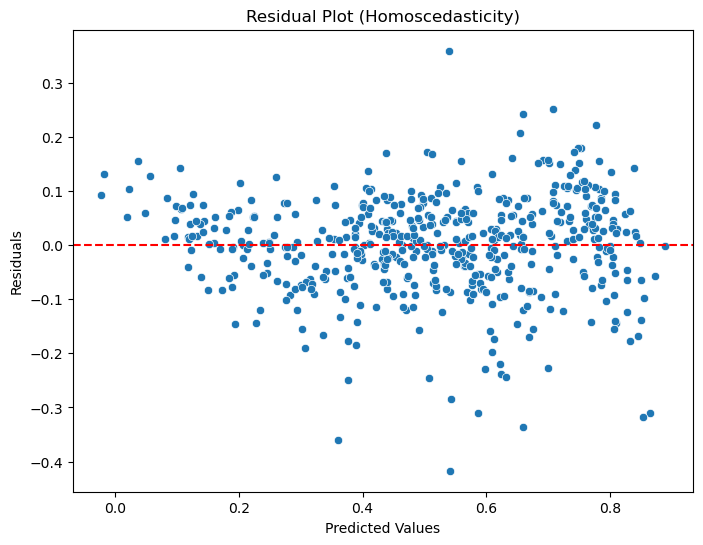

In [47]:
# Calculate predicted values and residuals
y_train_pred = reg_model_6.predict(sm.add_constant(X_train_reg_model_6))
residuals = y_train - y_train_pred

# Plot the scatter plot of Residuals vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Homoscedasticity)')
plt.show()

### 9. VALIDATE THE MODEL USING THE TEST SET.

In [48]:
# Apply scaling to the test dataset
df_test[num_cols] = scaler.transform(df_test[num_cols])
# Verify the head of the test dataset after scaling
df_test.head()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,count,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light snow/rain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# Drop the 'count' column from the test dataset and assign it to y_test
# Assign the target variable
y_test = df_test['count']
X_test = df_test.drop('count', axis=1)  # Drop the 'count' column from the training data
# Assign the remaining columns to X_test
cols=X_train_updated.columns
X_test = df_test[cols]
# Add a constant variable to the test dataframe
X_test_reg_model_6 = sm.add_constant(X_test)
# Predict the target variable for the test dataset
y_pred = reg_model_6.predict(X_test_reg_model_6)
y_test = y_test.values.reshape(-1, 1)
# Calculate the R-squared score
r2 = round(r2_score(y_test, y_pred), 4)
r2

0.8038

In [50]:
X_test.head()

,year,holiday,temperature,windspeed,spring,summer,winter,Sep,Light snow/rain,Misty
184,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1,0,0.901354,0.153728,0,1,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0


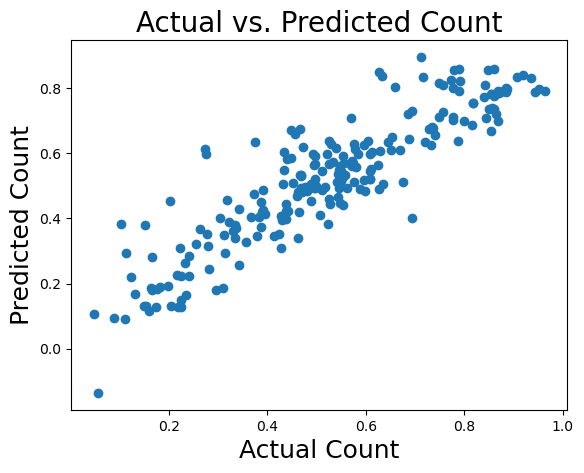

In [51]:
# Plotting actual vs predicted count
fig, ax = plt.subplots()
# Scatter plot of y_test vs y_pred
ax.scatter(y_test, y_pred)
# Setting the title and labels
ax.set_title('Actual vs. Predicted Count', fontsize=20)
ax.set_xlabel('Actual Count', fontsize=18)
ax.set_ylabel('Predicted Count', fontsize=18)
# Display the plot
plt.show()

this plot shows healthy and positive correlation between the actual and predicted values of Y and mostly clustered near to the line and can be observed in the later plot.

In [52]:
round(reg_model_6.params,4)

const              0.1909
year               0.2341
holiday           -0.0963
temperature        0.4777
windspeed         -0.1481
spring            -0.0554
summer             0.0621
winter             0.0945
Sep                0.0910
Light snow/rain   -0.2850
Misty             -0.0787
dtype: float64

from the above parameters we can actually write the line equation of the best fit line.

#### count = 0.1909 + 0.2341*year - 0.0963*holiday + 0.4777*temperature - 0.1481*windspeed - 0.0554*spring + 0.0621*summer + 0.0945*winter + 0.0910*Sep - 0.2850*Light snow/rain - 0.0787*Misty 

In [53]:
#calculating adjusted r-squared value
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


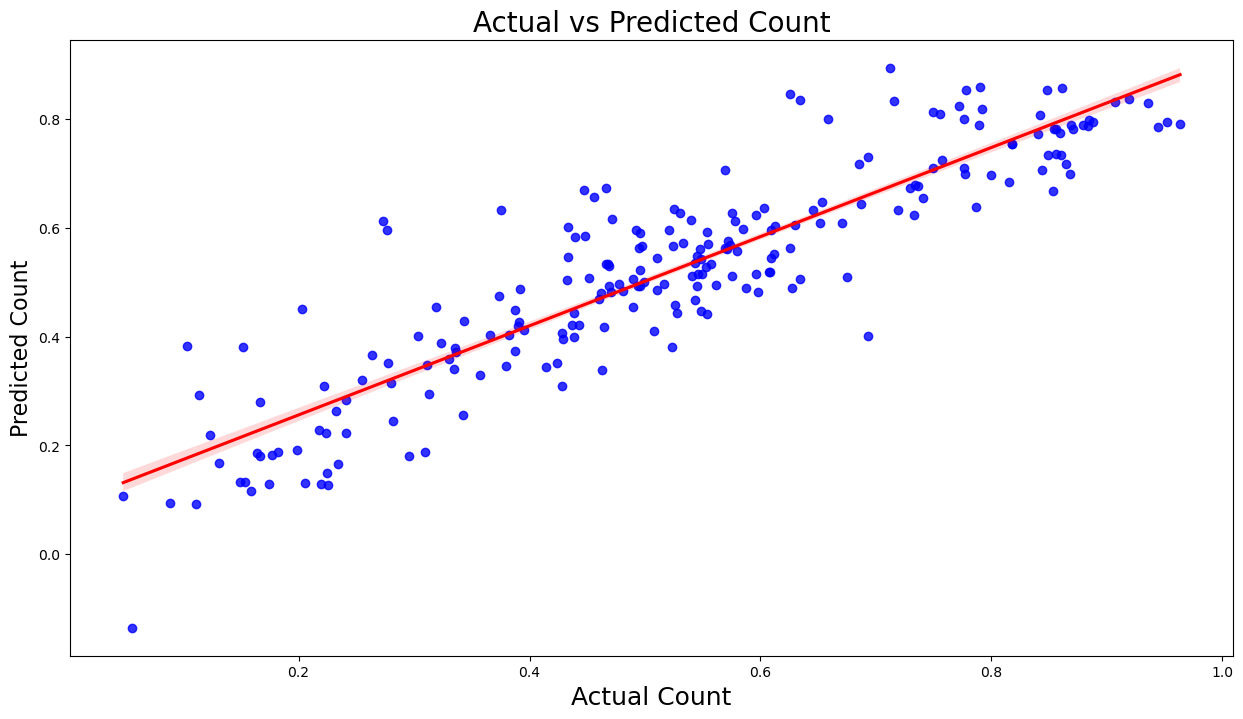

In [54]:
# Visualizing the fit on the test data
plt.figure(figsize=(15,8))
# Plotting a regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# Adding labels and title
plt.title('Actual vs Predicted Count', fontsize=20)
plt.xlabel('Actual Count', fontsize=18)
plt.ylabel('Predicted Count', fontsize=16)
plt.show()

#### The comparison between the training and testing datasets reveals the following metrics for evaluating the regression model:

- The R-squared value for the training dataset is 0.833, indicating that approximately 83.3% of the variability in the bike demand can be explained by the independent variables in the model.
- The R-squared value for the testing dataset is 0.8038, suggesting that around 80.38% of the variability in the bike demand is captured by the model on unseen data.
- The adjusted R-squared value for the training dataset is 0.829, which takes into account the number of predictors in the model, providing a more reliable measure of the model's goodness of fit.
- The adjusted R-squared value for the testing dataset is 0.7944, reflecting the adjusted goodness of fit on unseen data.

The demand of bikes is influenced by various factors such as year, holiday, temperature, windspeed, September month, presence of light snow/rain, misty conditions, and the seasons of spring, summer, and winter.

These metrics and the specified independent variables provide insights into the performance of the regression model in predicting bike demand and highlight the key factors affecting it.